In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score

In [2]:
# Leer el archivo CSV
data = pd.read_csv('Entrenamiento.csv', parse_dates=['fecha'], index_col=['fecha'], dayfirst=True)

In [3]:
# Ordenar el índice de fechas
data = data.sort_index()

In [4]:
# Dividir los datos en entrenamiento y prueba
train_df = data[:-365] # Todos los datos excepto los últimos 30 días
test_df = data[-365:] # Últimos 30 días

In [5]:
# Entrenar el modelo SARIMA
modelo_sarima = SARIMAX(train_df['temperatura_media'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))
resultado_sarima = modelo_sarima.fit(disp=False)

c:\Users\angel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\angel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [6]:
# Realizar predicciones
predicciones = resultado_sarima.predict(start=test_df.index[0], end=test_df.index[-1])

In [7]:
# Reemplazar NaN en predicciones con la media de los datos de entrenamiento
media_entrenamiento = train_df['temperatura_media'].mean()
predicciones_sin_nan = predicciones.fillna(media_entrenamiento)
test_df_sin_nan = test_df.loc[predicciones_sin_nan.index, 'temperatura_media']

In [8]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(test_df_sin_nan, predicciones_sin_nan)
print('Coeficiente de determinación (R^2):', r2 * r2)

Coeficiente de determinación (R^2): 0.9722515709533441


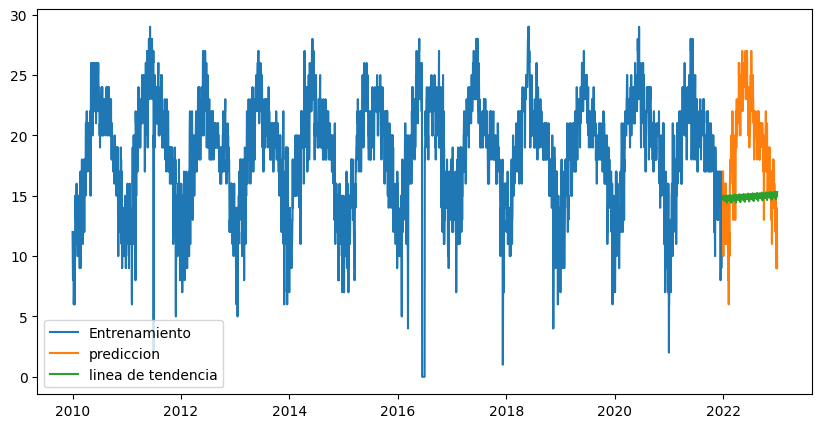

In [9]:
# Graficar los datos reales y las predicciones
plt.figure(figsize=(10, 5))
plt.plot(train_df.index, train_df['temperatura_media'], label='Entrenamiento')
plt.plot(test_df_sin_nan.index, test_df_sin_nan, label='prediccion')
plt.plot(predicciones_sin_nan.index, predicciones_sin_nan, label='linea de tendencia')
plt.legend()
plt.show()